### Duomenys: Lietuvos Statistikos departamento pateiktų tyrimų apie atlyginimus (pajamas) 2014 ir 2018 metais.

### Hipotezės:
1. Kaip keitėsi darbo užmokestis priklausomai nuo lyties?
2. Kaip keitėsi darbo užmokestis tarp dirbančių pilną, nepilną darbo dieną?
3. Kaip keitėsi darbo užmokestis tarp dirbančių terminuotai, neterminuotai?
4. Kaip keitėsi pajamos, jų pasiskirtymas tarp dirbančių didelėse, vidutinėse, mažose kompanijose?
5. Kaip keitėsi pajamos, jų pasiskirtymas priklausomai nuo išsilavinimo?
6. Kaip keitėsi pajamos, jų pasiskirtymas priklausomai nuo amžiaus?
7. Kuriais metais vyrai, moterys dirbo daugiau viršvalandoių?
8. Kurioje amžiaus grupėje viršvalandžiai buvo labiau įprastas dalykas?
9. Kuri amžiaus grupė bei lytis dirbo vidutiniškai daugiausiai valandų?
10. Koks vidutinio atlyginimo ir vidutinio valandų skaičiaus santykis kiekvienai amžiaus ir lyties grupei?

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

In [25]:
def braizyk_barplot(stul):
    sql = '''
    SELECT {st}, AVG({a})
    FROM dus{m}
    GROUP BY {st}
    ORDER BY {st};
    '''
    
    global L
    L = []

    c.execute(sql.format(st=stul, a='CB42/3.4528', m='2014'))
    ats = c.fetchall()
    for i in range(0,len(ats)):
        L.append([])
        L[i].append(float(ats[i][1]))

    c.execute(sql.format(st=stul, a='B42', m='2018'))
    ats = c.fetchall()
    for i in range(0,len(ats)):
        L[i].append(float(ats[i][1]))

In [26]:
def braizyk_boxplot(stul, grupe):
    sql = '''
    SELECT {a}
    FROM dus{m} 
    WHERE {st} = '{gr}';
    '''

    global L14
    L14 = []
    global L18
    L18 = []
    for grup in grupe:
        c.execute(sql.format(a='CB42/3.4528', m='2014', st=stul, gr=grup))
        ats = c.fetchall()
        L014 = []
        for eil in ats:
            L014.append(float(eil[0]))
        L14.append(L014)

        L018 = []
        c.execute(sql.format(a='B42', m='2018', st=stul, gr=grup))
        ats = c.fetchall()
        for eil in ats:
            L018.append(float(eil[0]))
        L18.append(L018)

In [27]:
def braizyk_pagal_gr(stul1, stul2):
    sql = '''
    SELECT B22_CLASS, {a}
    FROM dus{m}
    GROUP BY B22_CLASS, B21
    HAVING B21 = '{l}';
    '''

    lytis = ['F', 'M']

    global L14
    L14 = []
    for i in range(0,len(lytis)):
        L14.append([])
        c.execute(sql.format(a=stul1, m='2014', l=lytis[i]))
        ats = c.fetchall()
        for eil in ats:
            if ats.index(eil) == 1:
                L14[i][0] = (L14[i][0]+float(eil[1]))/2
            else:
                L14[i].append(float(eil[1]))

    global L18
    L18 = []
    for i in range(0,len(lytis)):
        L18.append([])
        c.execute(sql.format(a=stul2, m='2018', l=lytis[i]))
        ats = c.fetchall()
        for eil in ats:
            L18[i].append(float(eil[1]))

In [28]:
DB = cnt.connect(
    host = '88.223.121.130',
    port = 3306,
    user = 'user',
    password = 'slaptazodis'
)

c = DB.cursor()
c.execute('USE works')

1. Kaip keitėsi darbo užmokestis priklausomai nuo lyties?

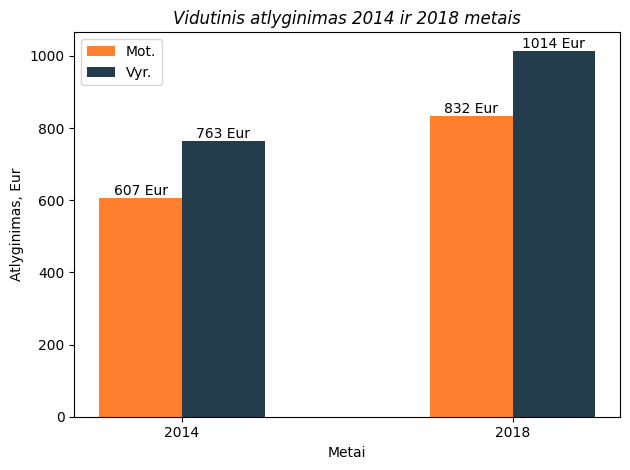

In [29]:
braizyk_barplot('B21')

x = np.asarray([1,2]) 

fig, ax1 = plt.subplots()

w=0.25
A = ax1.bar(x-w/2, L[0], width=w, label='Mot.', color='#fe7f2d')
B = ax1.bar(x+w/2, L[1], width=w, label='Vyr.', color='#233d4d')
ax1.set_xticks(x)
ax1.set_xticklabels(['2014', '2018'])
ax1.legend(loc=2)
ax1.bar_label(A, fmt='%.0f Eur')
ax1.bar_label(B, fmt='%.0f Eur')
ax1.set_xlabel('Metai')
ax1.set_ylabel('Atlyginimas, Eur')
ax1.set_title('Vidutinis atlyginimas 2014 ir 2018 metais', style='italic')

plt.tight_layout()
plt.show()

2. Kaip keitėsi darbo užmokestis tarp dirbančių pilną, nepilną darbo dieną?

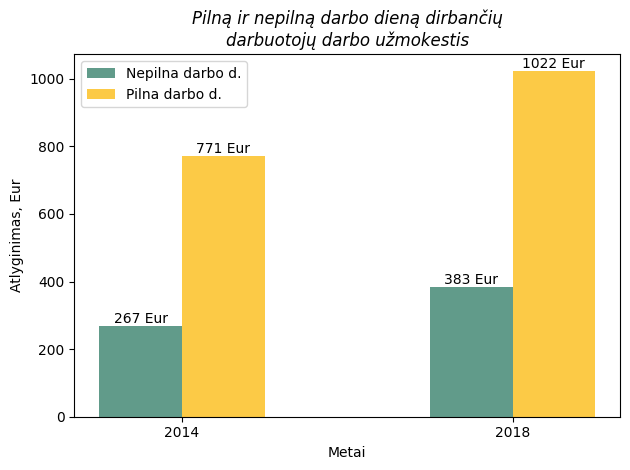

In [30]:
braizyk_barplot('B27')

fig, ax1 = plt.subplots()

w=0.25
B = ax1.bar(x-w/2, L[1], width=w, label='Nepilna darbo d.', color='#619b8a')
A = ax1.bar(x+w/2, L[0], width=w, label='Pilna darbo d.', color='#fcca46')
ax1.set_xticks(x)
ax1.set_xticklabels(['2014', '2018'])
ax1.legend(loc=2)
ax1.bar_label(A, fmt='%.0f Eur')
ax1.bar_label(B, fmt='%.0f Eur')
ax1.set_xlabel('Metai')
ax1.set_ylabel('Atlyginimas, Eur')
ax1.set_title('Pilną ir nepilną darbo dieną dirbančių\ndarbuotojų darbo užmokestis', style='italic')

plt.tight_layout()
plt.show()

3. Kaip keitėsi darbo užmokestis tarp dirbančių terminuotai, neterminuotai?

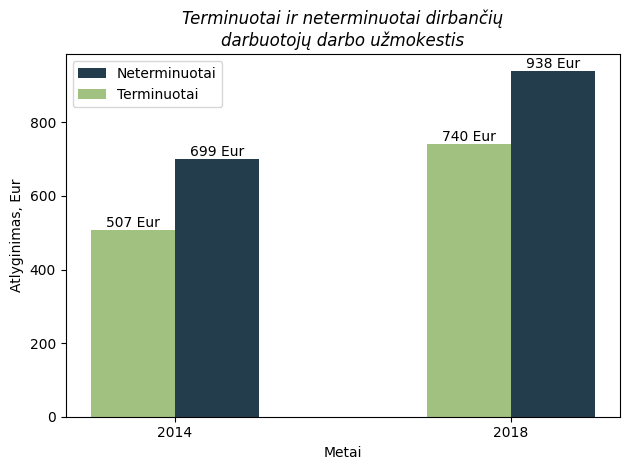

In [31]:
braizyk_barplot('B28')

fig, ax1 = plt.subplots()

w=0.25
C = ax1.bar(x+w/2, L[0], width=w, label='Neterminuotai', color='#233d4d')
D = ax1.bar(x-w/2, L[1], width=w, label='Terminuotai', color='#a1c181')
ax1.set_xticks(x)
ax1.set_xticklabels(['2014', '2018'])
ax1.legend(loc=2)
ax1.bar_label(C, fmt='%.0f Eur')
ax1.bar_label(D, fmt='%.0f Eur')
ax1.set_xlabel('Metai')
ax1.set_ylabel('Atlyginimas, Eur')
ax1.set_title('Terminuotai ir neterminuotai dirbančių\ndarbuotojų darbo užmokestis', style='italic')

plt.tight_layout()
plt.show()

4. Kaip keitėsi pajamos, jų pasiskirtymas tarp dirbančių didelėse, vidutinėse, mažose kompanijose?

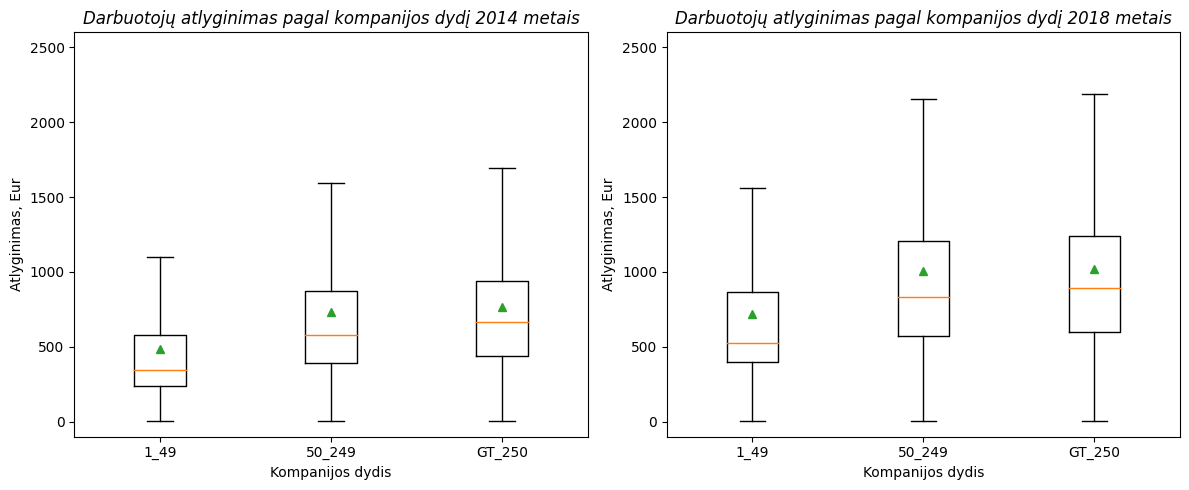

In [32]:
dydis = ['1_49','50_249', 'GT_250']
braizyk_boxplot('A12_CLASS', dydis)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.boxplot(L14, showmeans=True, showfliers=False)
ax1.set_xticklabels(dydis)
ax1.set_xlabel('Kompanijos dydis')
ax1.set_ylabel('Atlyginimas, Eur')
ax1.set_ylim(-100,2600)
ax1.set_title('Darbuotojų atlyginimas pagal kompanijos dydį 2014 metais', style='italic')

ax2.boxplot(L18, showmeans=True, showfliers=False)
ax2.set_xticklabels(dydis)
ax2.set_xlabel('Kompanijos dydis')
ax2.set_ylabel('Atlyginimas, Eur')
ax2.set_ylim(-100,2600)
ax2.set_title('Darbuotojų atlyginimas pagal kompanijos dydį 2018 metais', style='italic')

plt.tight_layout()
plt.show()

5. Kaip keitėsi pajamos, jų pasiskirtymas priklausomai nuo išsilavinimo?

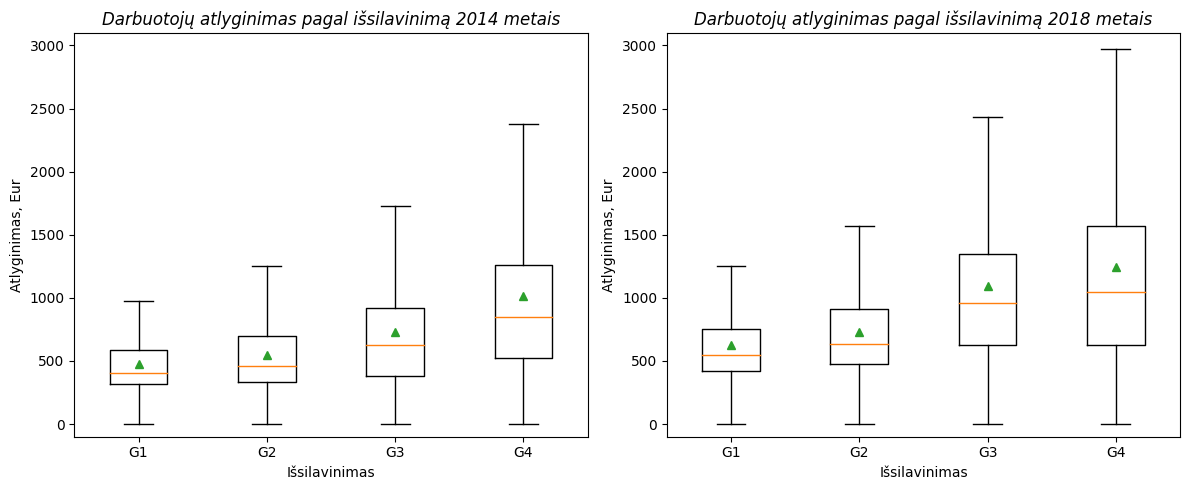

In [33]:
iss = ['G1','G2', 'G3', 'G4']
braizyk_boxplot('B25', iss)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.boxplot(L14, showmeans=True, showfliers=False)
ax1.set_xticklabels(iss)
ax1.set_xlabel('Išsilavinimas')
ax1.set_ylabel('Atlyginimas, Eur')
ax1.set_ylim(-100,3100)
ax1.set_title('Darbuotojų atlyginimas pagal išsilavinimą 2014 metais', style='italic')

ax2.boxplot(L18, showmeans=True, showfliers=False)
ax2.set_xticklabels(iss)
ax2.set_xlabel('Išsilavinimas')
ax2.set_ylabel('Atlyginimas, Eur')
ax2.set_ylim(-100,3100)
ax2.set_title('Darbuotojų atlyginimas pagal išsilavinimą 2018 metais', style='italic')

plt.tight_layout()
plt.show()

6. Kaip keitėsi pajamos, jų pasiskirtymas priklausomai nuo amžiaus?

In [34]:
sql = '''
SELECT {a}
FROM dus{m} 
WHERE {st} = '{gr}';
'''
amzius14 = ['14-19', '20-29', '30-39', '40-49', '50-59', '60+']
L14 = []
for amz in amzius14:
    c.execute(sql.format(a='CB42/3.4528', m='2014', st='B22_CLASS', gr=amz))
    ats = c.fetchall()
    L014 = []
    for eil in ats:
        L014.append(float(eil[0]))
    #L14.append(L014)
    if amzius14.index(amz) == 1:
        L14[0] = L14[0]+L014
    else:
        L14.append(L014)

amzius18= ['14-29', '30-39', '40-49', '50-59', '60+']
L18 = []
for amz in amzius18:
    L018 = []
    c.execute(sql.format(a='B42', m='2018', st='B22_CLASS', gr=amz))
    ats = c.fetchall()
    for eil in ats:
        L018.append(float(eil[0]))
    L18.append(L018)

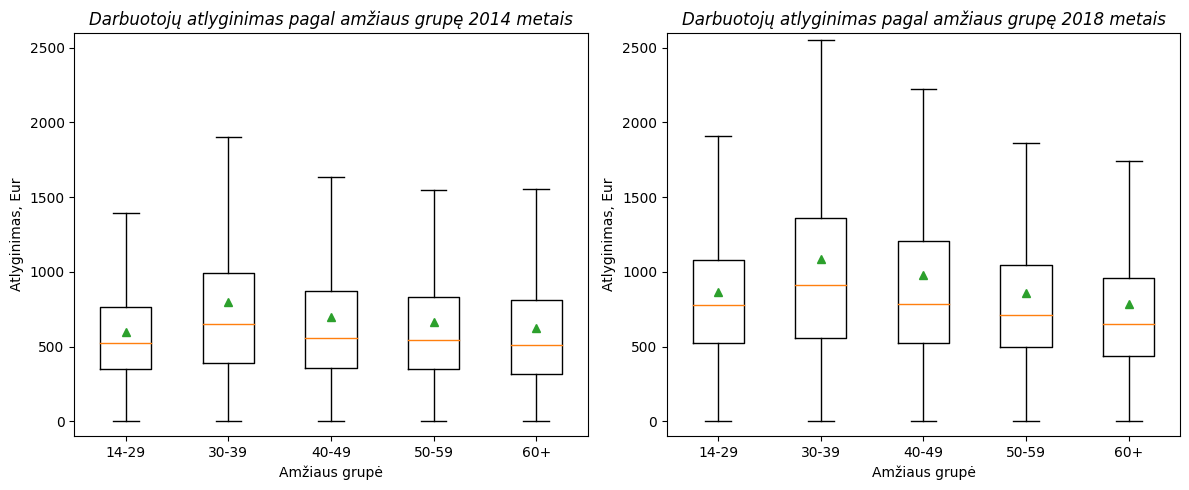

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.boxplot(L14, showmeans=True, showfliers=False)
ax1.set_xticklabels(amzius18)
ax1.set_xlabel('Amžiaus grupė')
ax1.set_ylabel('Atlyginimas, Eur')
ax1.set_ylim(-100,2600)
ax1.set_title('Darbuotojų atlyginimas pagal amžiaus grupę 2014 metais', style='italic')

ax2.boxplot(L18, showmeans=True, showfliers=False)
ax2.set_xticklabels(amzius18)
ax2.set_xlabel('Amžiaus grupė')
ax2.set_ylabel('Atlyginimas, Eur')
ax2.set_ylim(-100,2600)
ax2.set_title('Darbuotojų atlyginimas pagal amžiaus grupę 2018 metais', style='italic')

plt.tight_layout()
plt.show()

7. Kuriais metais vyrai, moterys dirbo daugiau viršvalandoių?

In [36]:
sql = '''
SELECT B21, SUM({a})
FROM dus{m}
GROUP BY B21
ORDER BY B21;
'''

c.execute(sql.format(a='CB321', m='2014'))
ats = c.fetchall()
F14 = (float(ats[0][1]))
M14 = (float(ats[1][1]))

c.execute(sql.format(a='B321', m='2018'))
ats = c.fetchall()
F18 = (float(ats[0][1]))
M18 = (float(ats[1][1]))

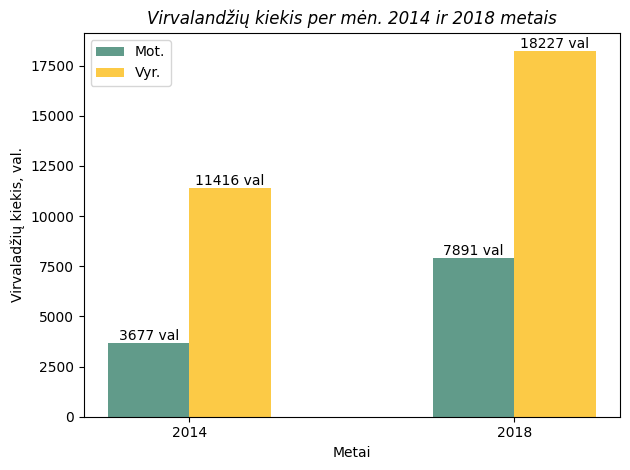

In [37]:
fig, ax1 = plt.subplots()

w=0.25
B = ax1.bar(x-w/2, [F14, F18], width=w, label='Mot.', color='#619b8a')
A = ax1.bar(x+w/2, [M14, M18], width=w, label='Vyr.', color='#fcca46')
ax1.set_xticks(x)
ax1.set_xticklabels(['2014', '2018'])
ax1.legend(loc=2)
ax1.bar_label(A, fmt='%.0f val')
ax1.bar_label(B, fmt='%.0f val')
ax1.set_xlabel('Metai')
ax1.set_ylabel('Virvaladžių kiekis, val.')
ax1.set_title('Virvalandžių kiekis per mėn. 2014 ir 2018 metais', style='italic')

plt.tight_layout()
plt.show()

8. Kurioje amžiaus grupėje viršvalandžiai buvo labiau įprastas dalykas?

In [38]:
sql = '''
SELECT B22_CLASS, SUM({a})
FROM dus{m}
GROUP BY B22_CLASS
ORDER BY B22_CLASS;
'''

L14 = []
L18 = []
c.execute(sql.format(a='CB321', m='2014'))
ats = c.fetchall()
for eil in ats:
    if ats.index(eil) == 1:
        L14[0] = L14[0]+float(eil[1])
    else:
        L14.append(float(eil[1]))

c.execute(sql.format(a='B321', m='2018'))
ats = c.fetchall()
for eil in ats:
    L18.append(float(eil[1]))

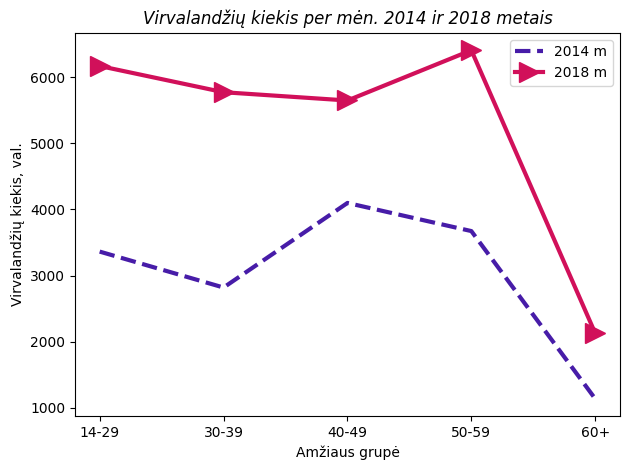

In [39]:
amzius = ['14-29', '30-39', '40-49', '50-59', '60+']
x = np.arange(0, len(amzius))

fig, ax1 = plt.subplots()

ax1.plot(x, L14, color='#471ca8', lw=3, ls='dashed', label='2014 m')
ax1.plot(x, L18, color='#d1105a', lw=3, marker='>', ms=15, label='2018 m')
ax1.set_xticks(x)
ax1.set_xticklabels(amzius)
ax1.set_xlabel('Amžiaus grupė')
ax1.set_ylabel('Virvalandžių kiekis, val.')
ax1.legend()
ax1.set_title('Virvalandžių kiekis per mėn. 2014 ir 2018 metais', style='italic')

plt.tight_layout()
plt.show()

9. Kuri amžiaus grupė bei lytis dirbo vidutiniškai daugiausiai valandų?

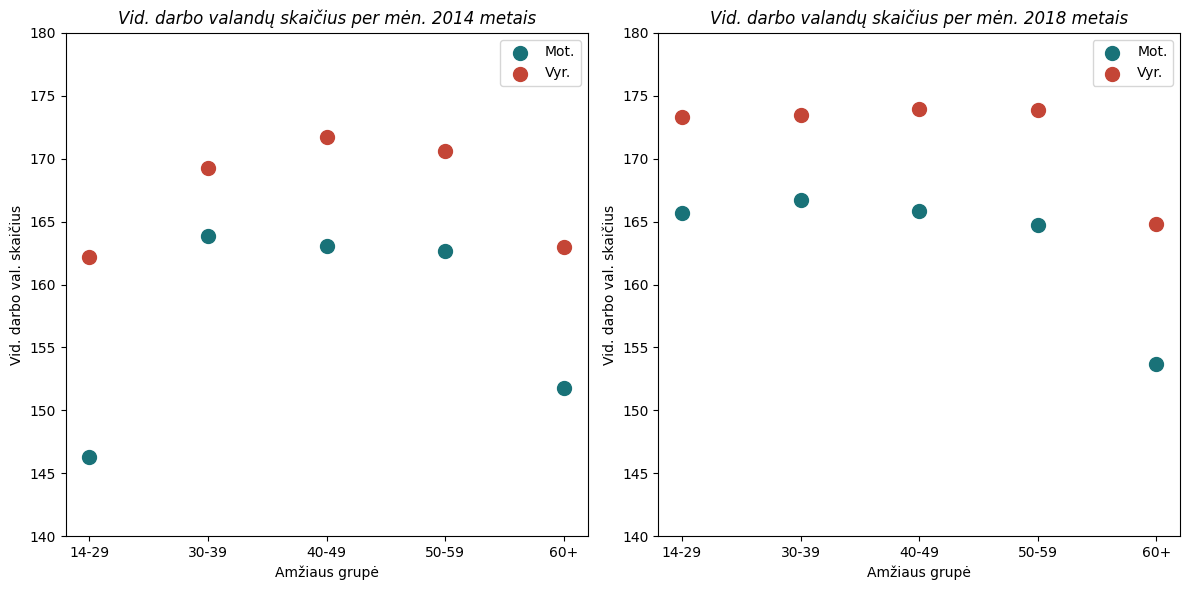

In [40]:
braizyk_pagal_gr('AVG(CB32)', 'AVG(B32)')

amzius = ['14-29', '30-39', '40-49', '50-59', '60+']
x = np.arange(0, len(amzius))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.scatter(x, L14[0], color='#197278', label='Mot.', s=100)
ax1.scatter(x, L14[1], color='#c44536', label='Vyr.', s=100)
ax1.set_xticks(x)
ax1.set_xticklabels(amzius)
ax1.set_xlabel('Amžiaus grupė')
ax1.set_ylabel('Vid. darbo val. skaičius')
ax1.legend()
ax1.set_ylim(140,180)
ax1.set_title('Vid. darbo valandų skaičius per mėn. 2014 metais', style='italic')

ax2.scatter(x, L18[0], color='#197278', label='Mot.', s=100)
ax2.scatter(x, L18[1], color='#c44536', label='Vyr.', s=100)
ax2.set_xticks(x)
ax2.set_xticklabels(amzius)
ax2.set_xlabel('Amžiaus grupė')
ax2.set_ylabel('Vid. darbo val. skaičius')
ax2.legend()
ax2.set_ylim(140,180)
ax2.set_title('Vid. darbo valandų skaičius per mėn. 2018 metais', style='italic')

plt.tight_layout()
plt.show()

10. Koks vidutinio atlyginimo ir vidutinio valandų skaičiaus santykis kiekvienai amžiaus ir lyties grupei?

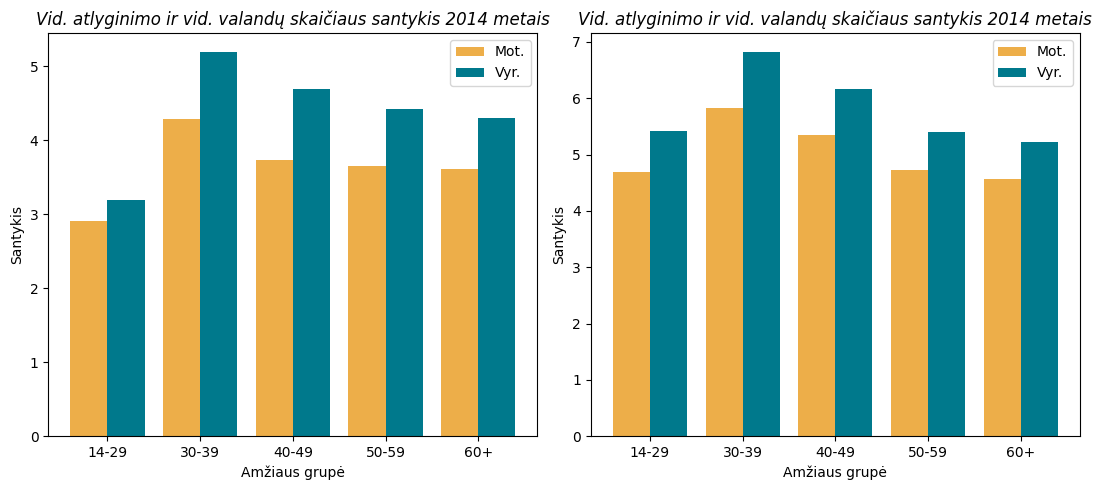

In [41]:
braizyk_pagal_gr('AVG(CB42/3.4528)/AVG(CB32)', 'AVG(B42)/AVG(B32)')

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(11,5))

w=0.4
ax1.bar(x-w/2, L14[0], color='#edae49', width=w, label='Mot.')
ax1.bar(x+w/2, L14[1], color='#00798c', width=w, label='Vyr.')
ax1.set_xticks(x)
ax1.set_xticklabels(amzius)
ax1.set_xlabel('Amžiaus grupė')
ax1.set_ylabel('Santykis')
ax1.legend()
ax1.set_title('Vid. atlyginimo ir vid. valandų skaičiaus santykis 2014 metais', style='italic')

ax2.bar(x-w/2, L18[0], color='#edae49', width=w, label='Mot.')
ax2.bar(x+w/2, L18[1], color='#00798c', width=w, label='Vyr.')
ax2.set_xticks(x)
ax2.set_xticklabels(amzius)
ax2.set_xlabel('Amžiaus grupė')
ax2.set_ylabel('Santykis')
ax2.legend()
ax2.set_title('Vid. atlyginimo ir vid. valandų skaičiaus santykis 2014 metais', style='italic')

plt.tight_layout()
plt.show()

In [42]:
DB.close()

### Įžvalgos:
1. Darbo užmokestis augo tiek vyrams, tiek moterims, tačiau vyrų atlyginimas buvo didesnis tiek 2014, tiek 2018 metais. To priežastis gali būti stereotipinis moterų nuvertinimas, vyrų gebėjimas reikalauti didesnio atlyginimo arba darbas viršvalandžiais.

2. Dirbančių nepilną darbo dieną atlyginimas augo šiek tiek labiau (43% augimas) nei dirbančių pilną darbo dieną (33% augimas). Tai galima būtų paaiškinti, kad dirbantys nepilną darbo dieną sumoka mažiau mokesčių.

3. Dirbančių neterminuotai atlyginimas kilo 46%, dirbančių terminuotai kilo mažiau - 34%. Galbūt įtakos turi tai, kad dirbant pagal terminuotą darbo sutartį sunkiau prašyti atlyginimo pakėlimo, o sutarties nutraukimas gali turėti finansinių paskemių.

4. Kuo didesnė įmonė, tuo didesnis tiek vidutinis atlyginimas, tiek maksimalus atlyginimas, tačiau 2018 metais didžiausias atlyginimas buvo labai panašus tiek vidutinio dydžio įmonėse, tiek didelėse įmonėse.

5. Kiek didesni išsilavinimas, tuo didesnis tiek vidutinis atlyginimas, tiek maksimalus atlyginimas. 2018 metais pastebima mažesnė vidutinio atlyginimo atskirtis tarp darbuotojų su išsilavinimu G3 ir G4.

6. Daugiausiai uždirba 30-39 metų amžiaus žmonės, mažiausiai 19-29 ir 60+ metų amžiaus žmonės. Tikėtina, kad daugelis įmonių ieško jaunų žmonių su didele patirtimi, todėl tokie žmonės dažnaiv patenka į 30-30 amžiaus grupę.

7. 2014 metais vyrai dirbdavo 3 kartus, o 2018 metais 2.3 karto daugiau viršvalandžių daugiau nei moterys. Tai galėjo turėti įtakos ir atlyginimo skirtumams tarp skiritngų lyčių.

8. 2014 metais daugiausiai viršvalandžių dribdavo 40-49 metų amžiaus žmonės, o 2018 - 50-59 metų amžiaus žmonės. Galbūt vyresni žmonės jausdamiesi dar pakankamai darbingi nusprendė dirbti daugiau, tam kad turėtų didesnes pajamas ir užsitiktintų finansiškai saugesnę senatvę.

9. 40-49 metų amžiaus vyrai tiek 2014, tiek 2018 metais dirbo daugiau viršvalandžių.

10. Didžiausias vidutinio atlyginimo ir vidutinio valandų skaičiaus santykis tenka 30-39 metų amžiaus vyrams, o mažiausias 14-29 metų amžiaus moterims.